In [1]:
import gensim
import pandas as pd
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import matplotlib.font_manager as fm
font_path = '../references/cmunorm.ttf'
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

In [3]:
model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format('../data/models/word2vec/keyedvectors.txt')

In [5]:
ruler = pd.read_excel('../pipeline/keyword_patterns.xlsx', index_col=None)
ruler = ruler.loc[:,ruler.columns[1:]]

In [6]:
word_sims = {}

for word in ruler.key.values:
    word_sims[word] = [sim for sim, dist in model.most_similar(word, topn=10) if sim not in ruler.key.values]
    
word_sims = [entry for entry in sorted(word_sims.items(), key=lambda x: len(x[1]), reverse=True) if len(entry[1]) > 0]

In [7]:
def wordform_average(word):
    return sum([model.get_vector(key) for key in
               ruler.key[ruler.wordform == word]])/len(ruler.key[ruler.wordform == word])

def keywords_umap(wordform=True):
    
    df = pd.DataFrame(index=ruler.key, data=[model.get_vector(key) for key in ruler.key])
    
    reducer = umap.UMAP()
    umap_data = reducer.fit_transform(df)
    umap_df = pd.DataFrame(umap_data, index=df.index, columns=['x', 'y'])
    
    if wordform:
        umap_wordform_df = pd.DataFrame(index=ruler.wordform.unique(), columns=['x', 'y'],
                                    data=[umap_df.loc[ruler.key[ruler.wordform==word],:].mean()
                                          for word in ruler.wordform.unique()])
        umap_wordform_df['phenomenon'] = [ruler.phenomenon.loc[ruler.wordform==word].values[0] for word in umap_wordform_df.index]
    
        return umap_wordform_df
    
    else:
        return umap_df
    
    #
    #    plt.figure(figsize=(12,12))
    #    sns.scatterplot(data=umap_df, x='x', y='y')
    #    plt.show()

In [11]:
umap_wordform_df = keywords_umap(wordform=True)

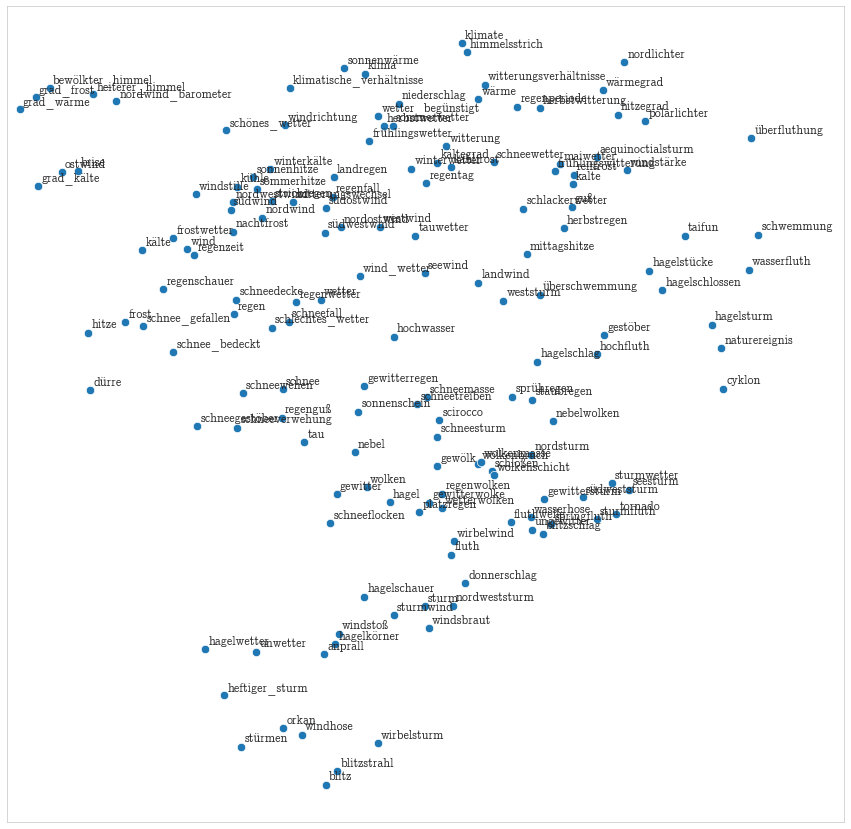

In [217]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(15,15))
matplotlib.rcParams['font.family'] = 'CMU Concrete'
sns.scatterplot(data=umap_wordform_df, x='x', y='y', s=70)
for ix, coords in umap_wordform_df.iterrows():
    plt.annotate(ix, (coords[0]+0.03, coords[1]+0.03), size=12)        
    
plt.grid(False)
plt.xlabel(None)
plt.ylabel(None)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.xlim((13.5,21.5))

#plt.savefig('../references/memoire/images/keyword_umap.pdf', bbox_inches='tight')

plt.show()

##### Un peu d'art

In [162]:
def all_words_umap(model):
    
    df = pd.DataFrame(index=model.index_to_key, data=[model.get_vector(key) for key in model.index_to_key])
    redcer = umap.UMAP()
    umap_data = reducer.fit_transform(df)
    umap_df = pd.DataFrame(data=umap_data, index=df.index, columns=['x', 'y'])
    
    return umap_df                      

In [163]:
all_words_umap_df = all_words_umap(model)

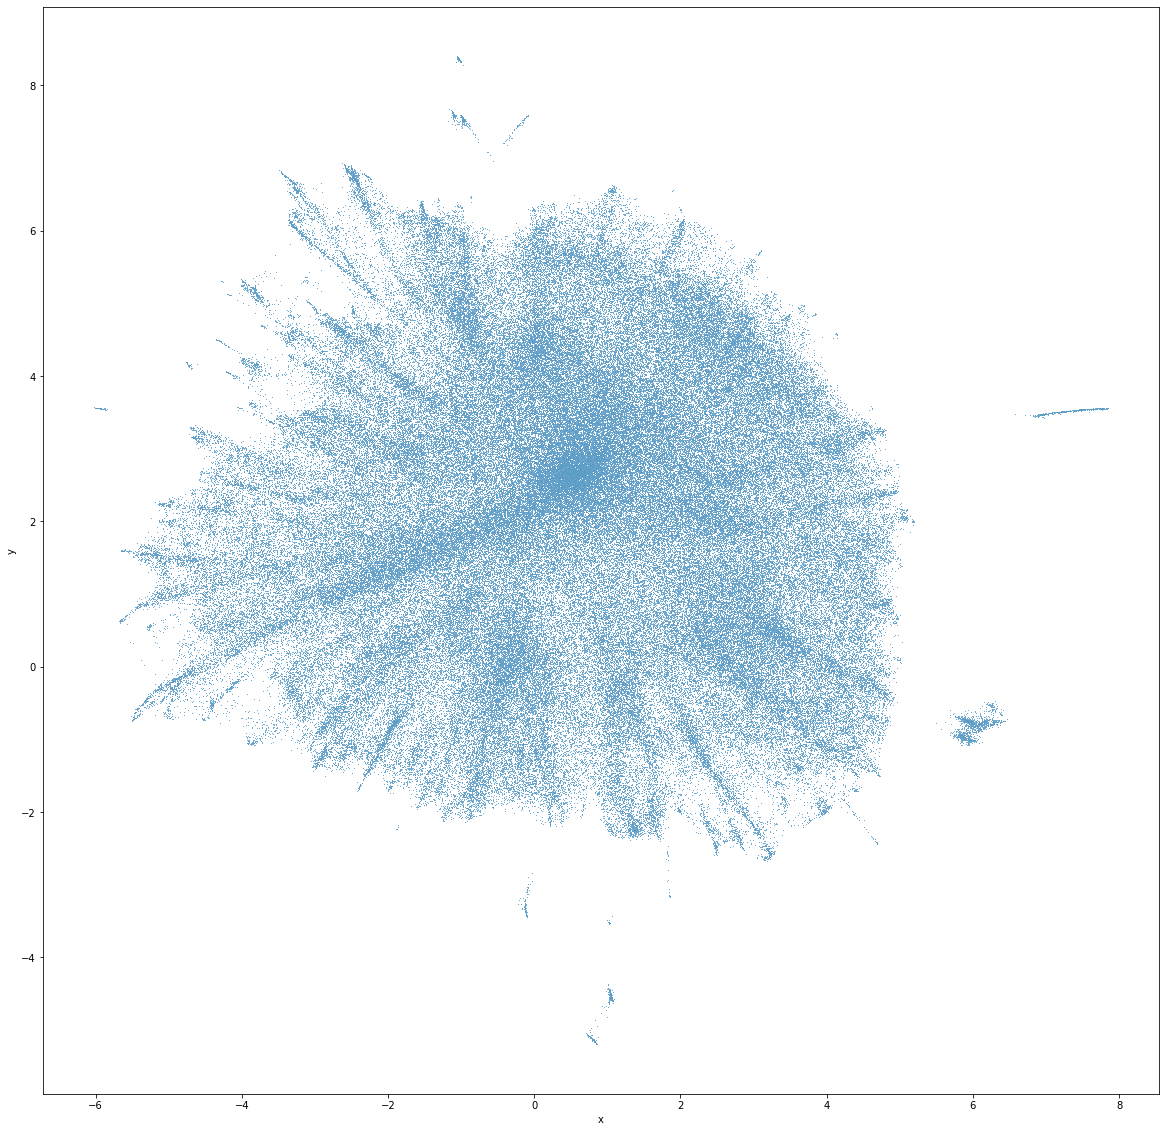

In [168]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=all_words_umap_df, x='x', y='y', s=1)
plt.show()              